<a href="https://colab.research.google.com/github/pabasara404/face-recognition-model/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 0.98, 'The dataset (40 people) ')

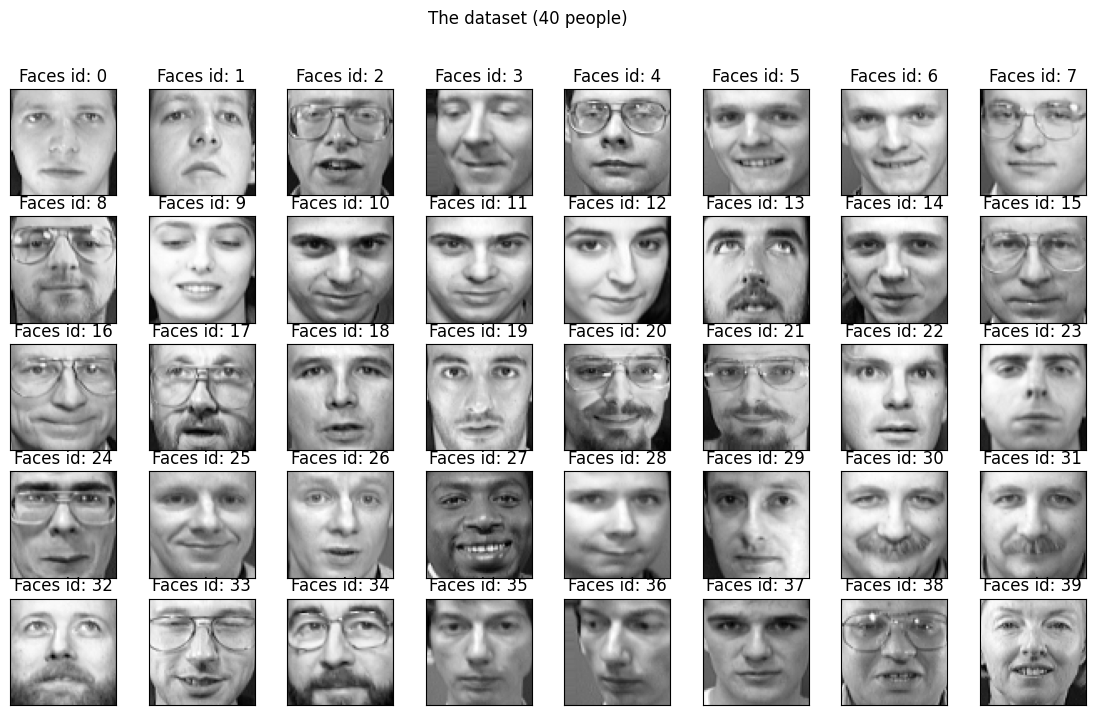

In [16]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import metrics
import numpy as np

olivetti_data = fetch_olivetti_faces()

features = olivetti_data.data
targets = olivetti_data.target

fig, sub_plots = plt.subplots(nrows=5, ncols=8, figsize=(14,8))
sub_plots = sub_plots.flatten()

for unique_user_id in np.unique(targets):
  image_index = unique_user_id * 8
  sub_plots[unique_user_id].imshow(features[image_index].reshape(64,64),cmap='gray')
  sub_plots[unique_user_id].set_xticks([])
  sub_plots[unique_user_id].set_yticks([])
  sub_plots[unique_user_id].set_title("Faces id: %s" % unique_user_id)
plt.suptitle('The dataset (40 people) ')
# plt.show()


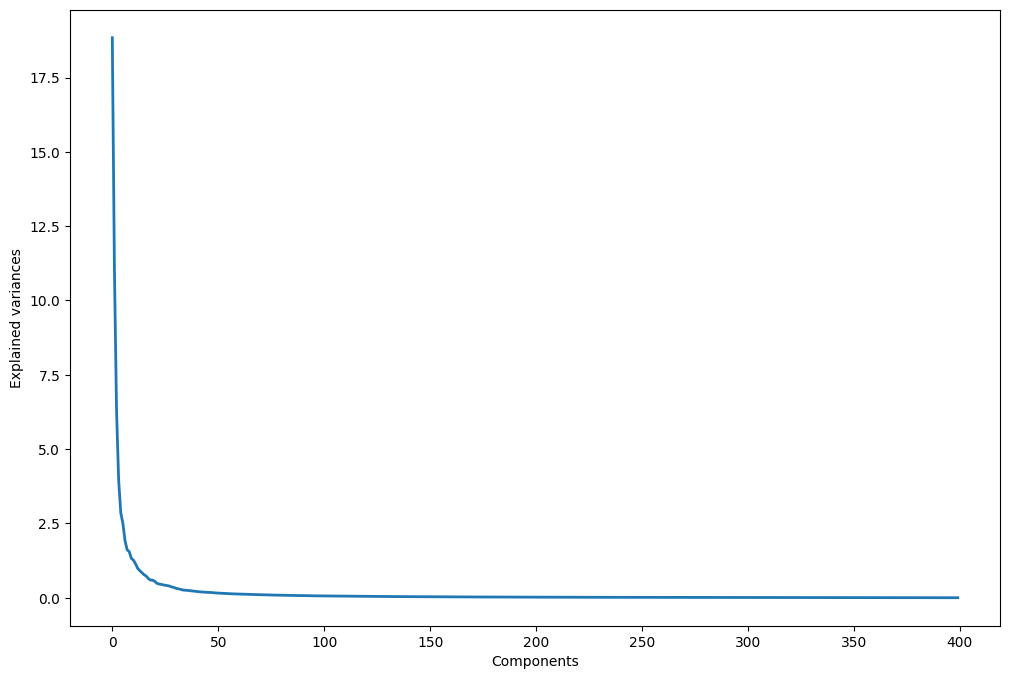

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.25, stratify=targets, random_state=0)

pca = PCA()
pca.fit(features)

plt.figure(1,figsize=(12, 8))
plt.plot(pca.explained_variance_, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained variances')
plt.show()



In [18]:
pca = PCA(n_components = 100, whiten=True)
pca.fit(X_train)
X_pca = pca.fit_transform(features)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

number_of_eigenfaces = len(pca.components_)
print(number_of_eigenfaces)

100


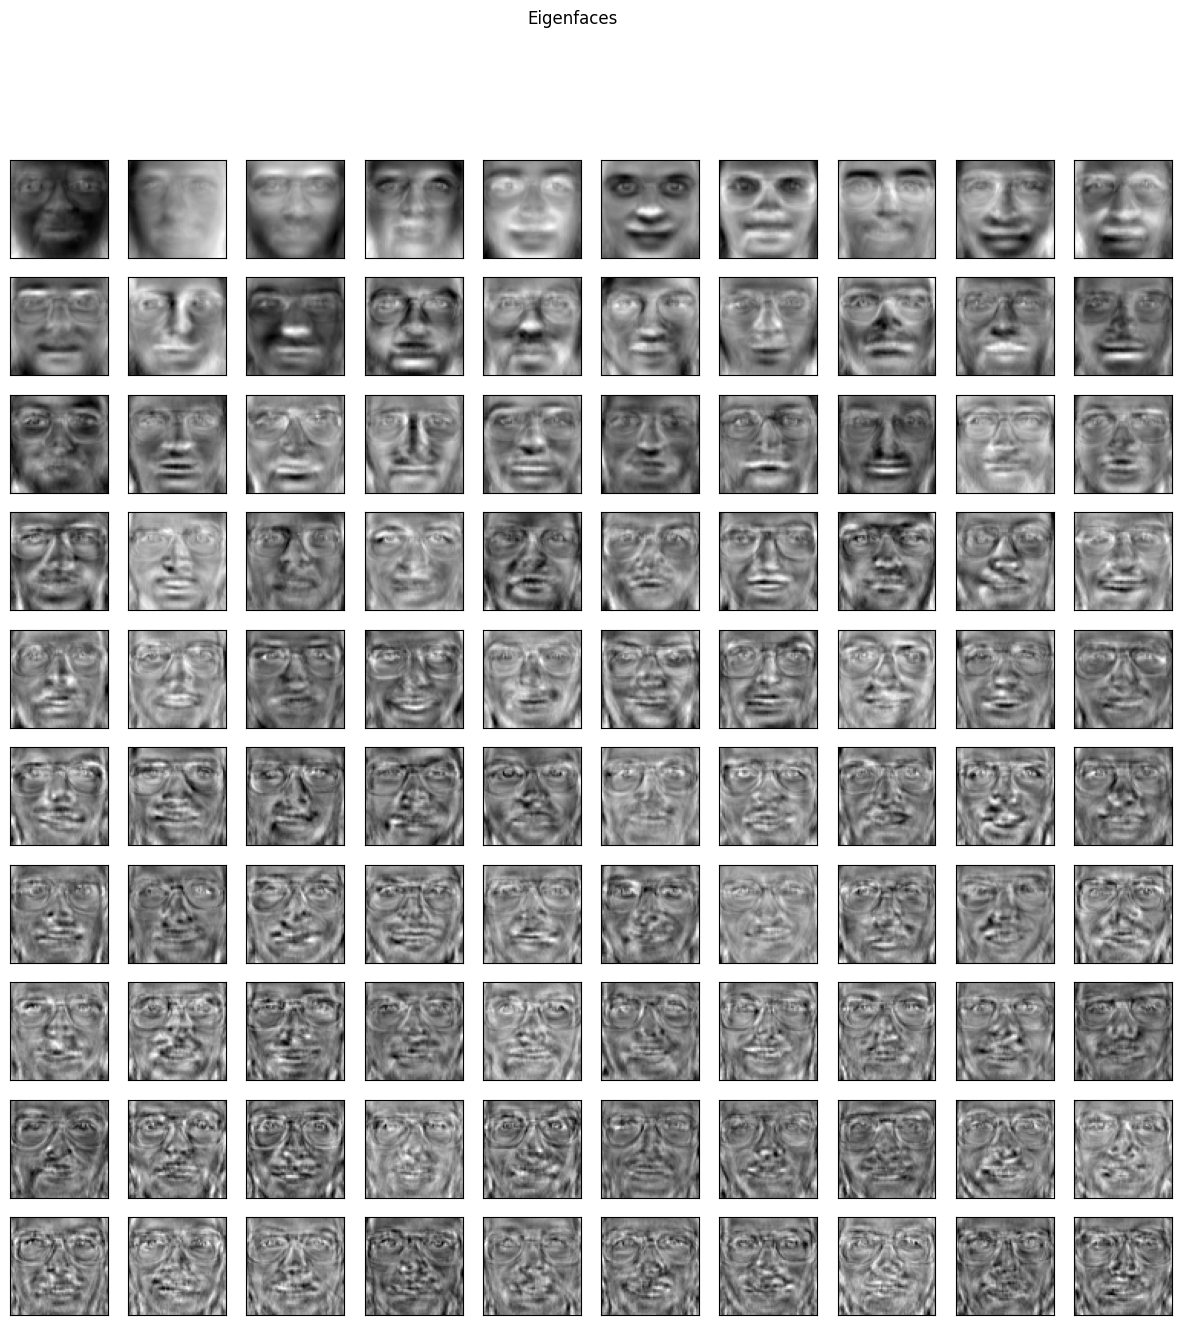

In [19]:
eigen_faces = pca.components_.reshape((number_of_eigenfaces, 64, 64))

fig, sub_plots = plt.subplots(nrows=10, ncols=10, figsize=(15, 15))
# print(sub_plots)
sub_plots = sub_plots.flatten()
# print(sub_plots)
for i in range(number_of_eigenfaces):
  sub_plots[i].imshow(eigen_faces[i], cmap='gray')
  sub_plots[i].set_xticks([])
  sub_plots[i].set_yticks([])

plt.suptitle("Eigenfaces")
plt.show()

In [20]:
models = [("Logistic Regression", LogisticRegression()), ("Support Vector Machine", SVC()), ("Naive Bayes Classifier", GaussianNB())]
for name, model in models:
  classifier_model = model
  classifier_model.fit(X_train_pca, y_train)

  y_predicted = classifier_model.predict(X_test_pca)
  print("Results with %s"%name)
  print("Accuracy acore: %s"%(metrics.accuracy_score(y_test, y_predicted)))


Results with Logistic Regression
Accuracy acore: 0.91
Results with Support Vector Machine
Accuracy acore: 0.93
Results with Naive Bayes Classifier
Accuracy acore: 0.86


In [22]:
for name, model in models:
  kfold = KFold(n_splits = 5, shuffle=True, random_state=0)
  cv_scores= cross_val_score(model, X_pca, targets, cv=kfold)
  print("Mean of the cross validation scores: %s"% cv_scores.mean())

Mean of the cross validation scores: 0.9325000000000001
Mean of the cross validation scores: 0.8525
Mean of the cross validation scores: 0.7550000000000001
